## 1. Regression project

### Working on an unclean dataset that contains information of several thousands cars’s resale value that were obtained from UK’s craiglist. 
### Implement several linear regression techniques to predict the resale value of those car.

## Library import and data loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 10)

#load data
df=pd.read_csv('unclean_data.csv')
df


,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


## Data Analysis, Preparation and Wrangling


### Handling missing rows

In [2]:
#drop rows where all values are missing.
df = df.dropna(thresh=1)

#reindex
df=df.reset_index(drop=True)

df.head(10)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
5,C Class,2020.0,"£30,999",Automatic,NaN,Diesel,2,"1,000",NaN,NaN,/ad/25059312
6,C Class,2020.0,"£35,999",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25418851
7,C Class,2019.0,"£37,990",Automatic,NaN,Petrol,3,"1,412",NaN,NaN,/ad/25449314
8,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,569",NaN,NaN,/ad/25046820
9,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,635",NaN,NaN,/ad/25046821


### Handling the currency symbols and comma format

In [3]:
# take out currency symbol
df["price"]=df["price"].apply(lambda x: x.replace("£", ""))

# take out comma
df["price"]=df["price"].apply(lambda x: x.replace(",", ""))

df.head(10)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
5,C Class,2020.0,30999,Automatic,NaN,Diesel,2,"1,000",NaN,NaN,/ad/25059312
6,C Class,2020.0,35999,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25418851
7,C Class,2019.0,37990,Automatic,NaN,Petrol,3,"1,412",NaN,NaN,/ad/25449314
8,C Class,2019.0,28990,Automatic,NaN,Diesel,2,"3,569",NaN,NaN,/ad/25046820
9,C Class,2019.0,28990,Automatic,NaN,Diesel,2,"3,635",NaN,NaN,/ad/25046821


### Handling non-valid column names

In [4]:
# change column names by replaceing white space with '_'
df.rename(columns={'fuel type':'fuel_type', 'engine size':'engine_size', 
                   'fuel type2':'fuel_type2', 'engine size2':'engine_size2'}
                  , inplace=True)
df.head(10)

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
5,C Class,2020.0,30999,Automatic,NaN,Diesel,2,"1,000",NaN,NaN,/ad/25059312
6,C Class,2020.0,35999,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25418851
7,C Class,2019.0,37990,Automatic,NaN,Petrol,3,"1,412",NaN,NaN,/ad/25449314
8,C Class,2019.0,28990,Automatic,NaN,Diesel,2,"3,569",NaN,NaN,/ad/25046820
9,C Class,2019.0,28990,Automatic,NaN,Diesel,2,"3,635",NaN,NaN,/ad/25046821


### Handling missing values in columns: fuel_type


In [5]:
#fiill missing value of fuel_type2 with fuel_type
#df['fuel_type2']=df.fuel_type2.fillna(df.fuel_type)
df.fuel_type2.fillna(df.fuel_type,inplace=True)

#drop "fuel_type"
df.drop(columns='fuel_type',inplace=True)

#change name
df.rename(columns={'fuel_type2': 'fuel_type'},inplace=True)
df


,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


### Handling missing values and comma format in columns: mileage

In [6]:
#fill missing value from mileage2 to mileage
df['mileage']=df.mileage.fillna(df.mileage2)


#drop "mileage2"
df.drop(columns='mileage2',inplace=True)

#take out comma
df["mileage"]=df["mileage"].apply(lambda x: x.replace(",", ""))

df.head(10)

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,Diesel,NaN,/ad/24913660
5,C Class,2020.0,30999,Automatic,1000,2,Diesel,NaN,/ad/25059312
6,C Class,2020.0,35999,Automatic,500,2,Diesel,NaN,/ad/25418851
7,C Class,2019.0,37990,Automatic,1412,3,Petrol,NaN,/ad/25449314
8,C Class,2019.0,28990,Automatic,3569,2,Diesel,NaN,/ad/25046820
9,C Class,2019.0,28990,Automatic,3635,2,Diesel,NaN,/ad/25046821


In [7]:
type(df['price'][1]) #check type

str

### Handling missing values and different value standard in columns: engine_size

In [8]:
#fill missing value from engine_size to engine_size2
df.engine_size2=df.engine_size2.fillna(df.engine_size)

#change to numeric
df.engine_size2=pd.to_numeric(df['engine_size2'],errors='coerce')

#standarize value
df.engine_size2=df.engine_size2.apply(lambda x: round(x/1000,1) if x>1000 else round(x,1) )

#drop engine_size
df.drop(columns="engine_size", inplace=True)

#rename engine_size
df.rename(columns={'engine_size2':'engine_size'}, inplace=True)

###  Handling wrong data type: year

In [9]:
# drop NaN value
df=df.dropna()

#change year to int
df.year=df['year'].astype('int64')

C:\Users\qpe04\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Handling unneeded columns

In [10]:
#drop the model and reference columns

df.drop(columns=['model', 'reference'],inplace=True)
df

C:\Users\qpe04\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200,Diesel,2.0
1,2020,29989,Automatic,1000,Petrol,1.5
2,2020,37899,Automatic,500,Diesel,2.0
3,2019,30399,Automatic,5000,Diesel,2.0
4,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...
3902,2017,14700,Manual,31357,Diesel,1.6
3903,2018,18500,Automatic,28248,Diesel,2.1
3904,2014,11900,Manual,48055,Diesel,2.1
3905,2014,11300,Automatic,49865,Diesel,2.1


### Handling categorical data

In [11]:
# generate dummies of transmission
transmission= pd.get_dummies(df['transmission'])
# add columns in the transmission into dataFrame's column
df= df.join(transmission) 

# generate dummies of fueltype
fuel_type= pd.get_dummies(df['fuel_type'])
fuel_type.rename(columns= {'Other': 'fuel_type_other'},inplace=True)
df= df.join(fuel_type)

#drop transmission and fuel_type
df.drop(columns='fuel_type',inplace=True)
df.drop('transmission',axis = 1, inplace = True)
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
0,2020,30495,1200,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,31357,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,28248,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,48055,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,49865,2.1,1,0,0,0,1,0,0,0


## Saving the cleaned data into csv

In [12]:
print('dataset has{} data point with {} variables each'.format(*df.shape))

dataset has3902 data point with 12 variables each


In [13]:
df.mileage= pd.to_numeric(df['mileage'],errors='coerce')
df.price= pd.to_numeric(df['price'],errors='coerce')
df=df.dropna()
df.to_csv('cleaned_data.csv')
df


,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


##  Exploratory Data Analysis and Visualization

<AxesSubplot:xlabel='engine_size', ylabel='count'>

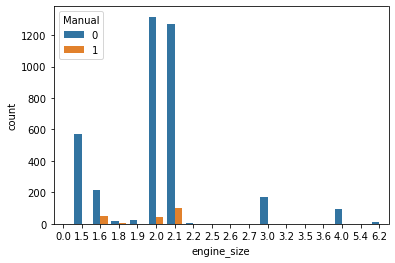

In [14]:
import seaborn as sns
sns.countplot(x='engine_size',hue='Manual',data= df)

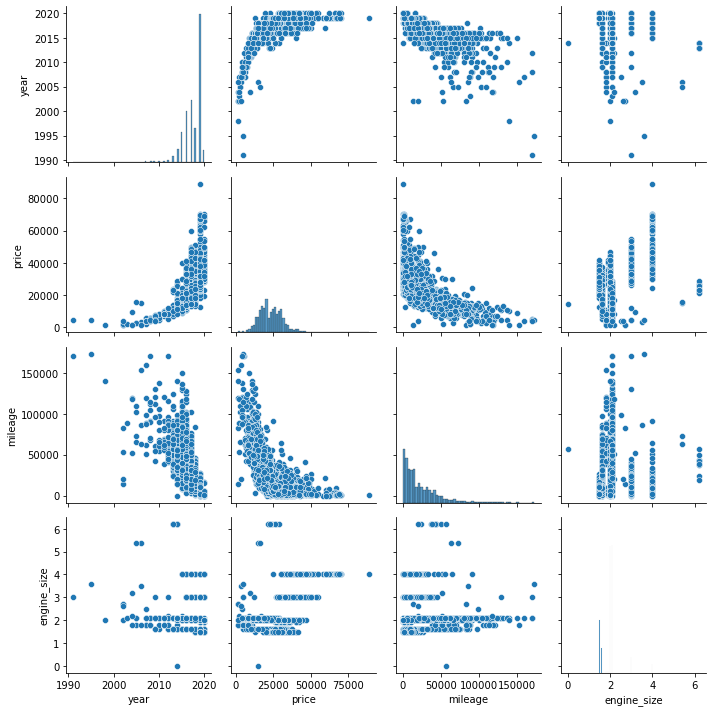

In [15]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df.iloc[:,0:4], height=2.5)
plt.tight_layout()

In [16]:
df.describe(include=None)

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.corr()


,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
year,1.000000,0.674218,-0.774710,-0.167651,-0.201754,-0.165483,-0.038814,0.273608,-0.133324,-0.096244,-0.009054,0.175537
price,0.674218,1.000000,-0.679101,0.373003,-0.098206,-0.241093,-0.020905,0.204057,-0.254683,-0.112066,-0.016542,0.306394
mileage,-0.774710,-0.679101,1.000000,0.100712,0.183310,0.220012,0.015795,-0.278694,0.176884,0.189994,0.045100,-0.260644
engine_size,-0.167651,0.373003,0.100712,1.000000,0.077083,-0.049730,0.031628,-0.055254,-0.033476,-0.002047,-0.002959,0.035237
Automatic,-0.201754,-0.098206,0.183310,0.077083,1.000000,-0.196322,-0.013559,-0.901168,0.022000,0.088895,0.046388,-0.061991
...,...,...,...,...,...,...,...,...,...,...,...,...
Semi-Auto,0.273608,0.204057,-0.278694,-0.055254,-0.901168,-0.246948,-0.017055,1.000000,-0.035372,-0.067205,-0.041803,0.066545
Diesel,-0.133324,-0.254683,0.176884,-0.033476,0.022000,0.029954,0.013078,-0.035372,1.000000,-0.245889,-0.048093,-0.918002
Hybrid,-0.096244,-0.112066,0.189994,-0.002047,0.088895,-0.046562,-0.003216,-0.067205,-0.245889,1.000000,-0.007882,-0.150452
fuel_type_other,-0.009054,-0.016542,0.045100,-0.002959,0.046388,-0.009107,-0.000629,-0.041803,-0.048093,-0.007882,1.000000,-0.029427


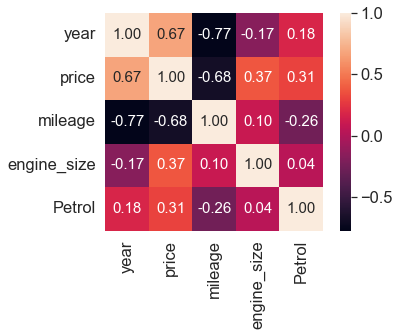

In [18]:
# Calculate and show correlation matrix by using heatmap()
cm = np.corrcoef(df.iloc[:,[0,1,2,3,-1]].values.T)
#np.corrcoef(df.loc[:,['year','price','mileage', ' Petrol']].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
        cbar=True,
        annot=True,
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
       yticklabels=df.iloc[:,[0,1,2,3,-1]].columns,
       xticklabels=df.iloc[:,[0,1,2,3,-1]].columns)
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3898 entries, 0 to 3906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             3898 non-null   int64  
 1   price            3898 non-null   int64  
 2   mileage          3898 non-null   float64
 3   engine_size      3898 non-null   float64
 4   Automatic        3898 non-null   uint8  
 5   Manual           3898 non-null   uint8  
 6   Other            3898 non-null   uint8  
 7   Semi-Auto        3898 non-null   uint8  
 8   Diesel           3898 non-null   uint8  
 9   Hybrid           3898 non-null   uint8  
 10  fuel_type_other  3898 non-null   uint8  
 11  Petrol           3898 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 311.8 KB


## Feature Observation and Hypothesis

 ### As above resoult we can see only mileage and year are relate to price

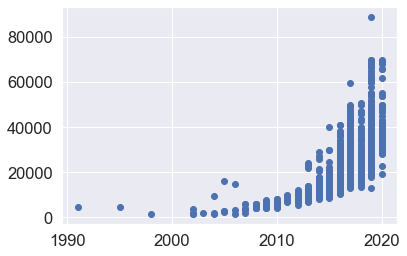

In [20]:
# check is there any relationship between year of car and the price
plt.scatter(df.year, df.price) 

C:\Users\qpe04\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


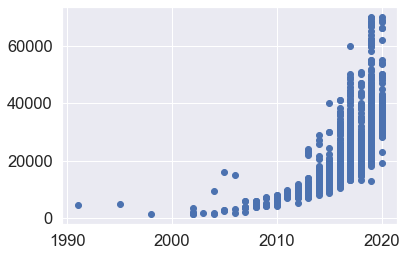

In [21]:
#Find a outlier price, so drop price > 8000
df.drop(df[df['price']>80000].index,inplace=True)
plt.scatter(df.year, df.price) 

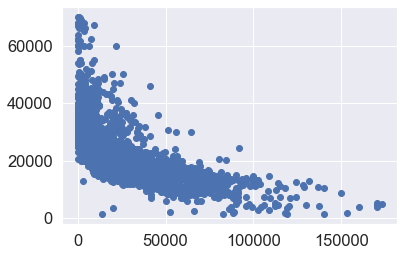

In [22]:
# check is there any relationship between mileage of car and the price
plt.scatter(df.mileage, df.price) 

 I can assum that 1.the price is higher as alon as year of the car is younger. 2.lower mileage cause higher price 


In [23]:
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


##  A Simple Linear Regression Model

In [24]:
#Devide the df into feature and response. 
#Drop one feature that generated from each of the categorical data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
response = df.price
#features = df.drop(['price','Other','fuel_type_other'],axis=1)
#features = df.drop('price',axis=1)
#features = df.loc[:,['year','mileage','engine_size']]
#features= df[['year','mileage','engine_size']]
features=df.drop(['price', 'Other', 'fuel_type_other', 'Automatic', 'Petrol'], axis=1)

#split 75:25
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size = 0.25, random_state=42)

model= LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)


### I choose these features because they are less associated 

In [25]:
#r2
r2 = model.score(X_test,Y_test)
print('r2 testing is',r2)


#rmse
rmse = mean_squared_error(Y_test,pred)**0.5
print('RMSE is',rmse)

r2 testing is 0.7720855407821321
RMSE is 4453.718027452554


Text(0.5, 1.0, 'predicted vs actual')

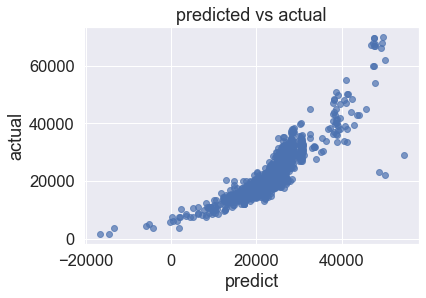

In [26]:
#plot the predicted vs actual
actual_value = Y_test
plt.scatter(pred,actual_value,alpha=0.7,color='b')
plt.xlabel('predict')
plt.ylabel('actual')
plt.title('predicted vs actual')

### Above graph shows our model is predicting good results. 

In [27]:
#Check the coefficients
feat=list(X_train.columns)
coef= model.coef_.transpose()
coef_table=np.vstack((feat,coef)).T
result_df=pd.DataFrame(coef_table,columns=['feature','coefficients'])
result_df

,feature,coefficients
0,year,1879.1580622742715
1,mileage,-0.12855263410625956
2,engine_size,8496.593027334635
3,Manual,-2758.724924361801
4,Semi-Auto,-371.9786706652335
5,Diesel,-2261.2683185550295
6,Hybrid,-1829.5181899308861


## Linear Regression Model with Ridge

In [28]:
from sklearn.linear_model import Ridge 
y= df.price
x= df.drop('price',axis=1)

In [29]:
from sklearn.model_selection import train_test_split
#use 75:25 for training and testing. 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.25, random_state=42)
df.head(10)


,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_other,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
5,2020,30999,1000.0,2.0,1,0,0,0,1,0,0,0
6,2020,35999,500.0,2.0,1,0,0,0,1,0,0,0
7,2019,37990,1412.0,3.0,1,0,0,0,0,0,0,1
8,2019,28990,3569.0,2.0,1,0,0,0,1,0,0,0
9,2019,28990,3635.0,2.0,1,0,0,0,1,0,0,0


In [30]:
alphas = 10 ** np.linspace(5,-2,10)
alphas

array([1.00000000e+05, 1.66810054e+04, 2.78255940e+03, 4.64158883e+02,
       7.74263683e+01, 1.29154967e+01, 2.15443469e+00, 3.59381366e-01,
       5.99484250e-02, 1.00000000e-02])

In [31]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x,y)
    coefs.append(ridge.coef_)
    
np.shape(coefs) 
coefs

[array([ 2.73293339e-02, -2.68543912e-06,  6.73540337e-02, -1.75459412e-02,
        -9.78989697e-02, -1.16706535e-01,  3.63048596e-02, -4.61463606e-02,
        -5.18235247e-02, -3.76111205e-02,  5.67236350e-02]),
 array([ 1.63818648e-01, -1.60970821e-05,  4.03766104e-01, -1.05158113e-01,
        -5.86821237e-01, -6.99547078e-01,  2.17602247e-01, -2.76599615e-01,
        -3.10632170e-01, -2.25431157e-01,  3.39999979e-01]),
 array([ 9.81477933e-01, -9.64383382e-05,  2.42012883e+00, -6.29435654e-01,
        -3.51547089e+00, -4.19043537e+00,  1.30306709e+00, -1.65671524e+00,
        -1.86069365e+00, -1.34993123e+00,  2.03647696e+00]),
 array([ 5.86273734e+00, -5.75946143e-04,  1.44944152e+01, -3.73872771e+00,
        -2.09877594e+01, -2.50052456e+01,  7.76081807e+00, -9.87971442e+00,
        -1.11010246e+01, -8.03928902e+00,  1.21451182e+01]),
 array([ 3.44102479e+01, -3.37632772e-03,  8.63878275e+01, -2.12188746e+01,
        -1.22776767e+02, -1.45879144e+02,  4.47626638e+01, -5.74177295e+

In [32]:
#print the model coefficients for the alpha.rmas, r2
rmse_list = []
r2_list = []

for a in alphas:
    ridge = Ridge(alpha = a, normalize = True, max_iter = 1000)
    ridge.fit(Xtrain, Ytrain)
    pred = ridge.predict(Xtest)
    
    r2_list.append(ridge.score(Xtest, Ytest))
    rmse = mean_squared_error(Ytest, pred)**0.5
    rmse_list.append(rmse)
    print("RMSE:", rmse)
    
ridge_result = np.vstack((alphas, rmse_list, r2_list)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', 'R2'])
print(ridge_df)

RMSE: 9336.793104048307
RMSE: 9336.226328654533
RMSE: 9332.83146644476
RMSE: 9312.58225738757
RMSE: 9194.75283441596
RMSE: 8594.917761812663
RMSE: 6775.6840219691785
RMSE: 4946.527769473825
RMSE: 4509.597261750346
RMSE: 4461.6149870668705
           Alpha         RMSE        R2
0  100000.000000  9336.793104 -0.001664
1   16681.005372  9336.226329 -0.001542
2    2782.559402  9332.831466 -0.000814
3     464.158883  9312.582257  0.003524
4      77.426368  9194.752834  0.028581
5      12.915497  8594.917762  0.151191
6       2.154435  6775.684022  0.472488
7       0.359381  4946.527769  0.718857
8       0.059948  4509.597262  0.766331
9       0.010000  4461.614987  0.771277


In [33]:
# r2 & rmse
ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(Xtrain, Ytrain) 
r2 = ridge.score(Xtest, Ytest)
predicted = ridge.predict(Xtest)
rmse = mean_squared_error(Ytest, pred)**0.5

print('r^2 is : ', r2)
print('rmse is : ', rmse)

r^2 is :  0.7712765865897634
rmse is :  4461.6149870668705


In [34]:
#model coefficients

print(pd.Series(ridge.coef_, index = x.columns))

year               1848.698539
mileage              -0.129000
engine_size        8396.822237
Automatic           417.479239
Manual            -2361.342307
                      ...     
Semi-Auto            62.017350
Diesel            -1063.751166
Hybrid             -645.202438
fuel_type_other     919.139582
Petrol             1205.049339
Length: 11, dtype: float64


Text(0.5, 1.0, 'predicted vs actual')

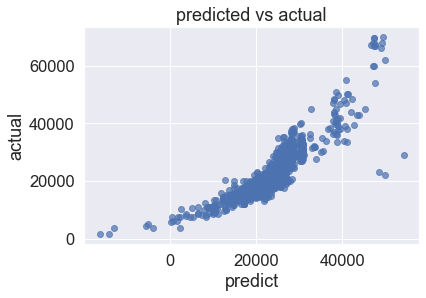

In [35]:
#plot the predicted vs actual
actual_value = Ytest
plt.scatter(predicted,actual_value,alpha=0.7,color='b')
plt.xlabel('predict')
plt.ylabel('actual')
plt.title('predicted vs actual')

## Ploynomial regression with ridge/Lasso



In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(features.loc[:,['mileage']])

Training and testing split was successful.
          Alpha         RMSE        R2
0  1.000000e+02  5096.255657  0.701207
1  1.000000e+01  5051.684511  0.706410
2  1.000000e+00  5052.752085  0.706286
3  1.000000e-01  5052.976850  0.706260
4  1.000000e-02  5053.000655  0.706257
5  1.000000e-04  5053.003289  0.706257
6  1.000000e-06  5053.003315  0.706257
7  1.000000e-08  5053.003315  0.706257


C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15355e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.11646e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58384e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.5307e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52539e-21): result may not be accurate.

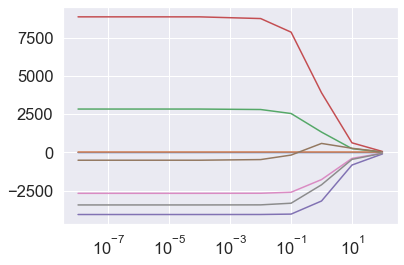

In [37]:
X_poly=pd.DataFrame(X_poly, columns=('mileage',  'mileage^2'))

df_poly=X_poly.join(df.drop(['mileage','Other','fuel_type_other',  'Automatic', 'Petrol'],axis=1))

df_poly=df_poly.dropna()
df_poly.isnull().sum().sum()
poly_features=df_poly.drop(['price'], axis=1)
poly_response=df_poly['price']



X_train, X_test, Y_train, Y_test= train_test_split(poly_features, poly_response, test_size=0.2, random_state=42)
print("Training and testing split was successful.")

alphas=[100,10,1,0.1,1e-2,1e-4,1e-6,1e-8]



ridge=Ridge(normalize=True)

coefs=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
np.shape(coefs)
rmse_list=[]
r2_list=[]

plt.plot(alphas,coefs)
ax=plt.gca()
ax.set_xscale('log')

from sklearn.metrics import mean_squared_error


rmse_list=[]
r2_list=[]
for a in alphas:
    ridge=Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train, Y_train)
    pred=ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_test, Y_test))
    rmse=mean_squared_error(Y_test, pred)**0.5
    rmse_list.append(rmse)
ridge_result=np.vstack((alphas, rmse_list, r2_list)).T
ridge_df=pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', 'R2'])
print(ridge_df)


In [38]:
print(ridge_df)

          Alpha         RMSE        R2
0  1.000000e+02  5096.255657  0.701207
1  1.000000e+01  5051.684511  0.706410
2  1.000000e+00  5052.752085  0.706286
3  1.000000e-01  5052.976850  0.706260
4  1.000000e-02  5053.000655  0.706257
5  1.000000e-04  5053.003289  0.706257
6  1.000000e-06  5053.003315  0.706257
7  1.000000e-08  5053.003315  0.706257


### polynomial: mileage with Lasso

In [39]:
from sklearn.linear_model import Lasso 
rmse_list = []
r2_list = []
for a in alphas:
    lasso = Lasso(alpha = a, normalize = True, max_iter=1000)
    lasso.fit(X_train, Y_train)             # Fit a ridge regression on the training data
    pred = lasso.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge.coef_, index = x.columns)) # Print coefficients
    
    r2_list.append(lasso.score(X_test, Y_test))
    rmse = mean_squared_error(Y_test, pred)**0.5
    rmse_list.append(rmse)
    print("RMSE ", rmse)          # Calculate the test MSE

lasso_result = np.vstack((alphas, rmse_list, r2_list)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alpha', 'RMSE', "R2"])
lasso_df

RMSE  8980.386199137783
RMSE  5196.74343978513
RMSE  5062.762766853859
RMSE  5052.921225258284
RMSE  5052.984142836165
RMSE  5053.003113310068
RMSE  5053.0033131783775
RMSE  5053.003315187971


,Alpha,RMSE,R2
0,1.000000e+02,8980.386199,0.072191
1,1.000000e+01,5196.743440,0.689307
2,1.000000e+00,5062.762767,0.705121
3,1.000000e-01,5052.921225,0.706266
4,1.000000e-02,5052.984143,0.706259
5,1.000000e-04,5053.003113,0.706257
6,1.000000e-06,5053.003313,0.706257
7,1.000000e-08,5053.003315,0.706257


### polynomial: mileage and year with ridge

In [40]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(features.loc[:,['year', 'mileage']])

In [41]:
X_poly=pd.DataFrame(X_poly, columns=('year', 'mileage', 'year^2', 'year*mileage', 'mileage^2'))

df_poly=X_poly.join(df.drop(['year','mileage','Other','fuel_type_other',  'Automatic', 'Petrol'],axis=1))

df_poly=df_poly.dropna()
df_poly.isnull().sum().sum()
poly_features=df_poly.drop(['price'], axis=1)
poly_response=df_poly['price']

In [42]:

X_train, X_test, Y_train, Y_test= train_test_split(poly_features, poly_response, test_size=0.2, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [43]:
alphas=[100,10,1,0.1,1e-2,1e-4,1e-6,1e-8]

In [44]:
ridge=Ridge(normalize=True)

coefs=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
np.shape(coefs)
rmse_list=[]
r2_list=[]


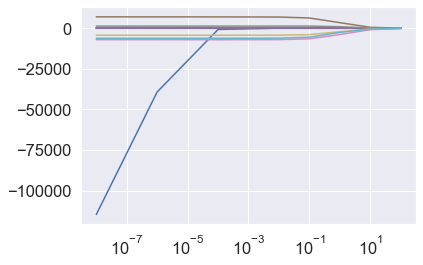

In [45]:
plt.plot(alphas,coefs)
ax=plt.gca()
ax.set_xscale('log')

In [46]:
rmse_list=[]
r2_list=[]
for a in alphas:
    ridge=Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train, Y_train)
    pred=ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_test, Y_test))
    rmse=mean_squared_error(Y_test, pred)**0.5
    rmse_list.append(rmse)
ridge_result=np.vstack((alphas, rmse_list, r2_list)).T
ridge_df=pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', 'R2'])
print(ridge_df)

          Alpha         RMSE        R2
0  1.000000e+02  7443.084627  0.362655
1  1.000000e+01  7400.826419  0.369872
2  1.000000e+00  7403.377766  0.369437
3  1.000000e-01  7404.101191  0.369314
4  1.000000e-02  7406.746167  0.368863
5  1.000000e-04  7414.963937  0.367462
6  1.000000e-06  7415.229345  0.367417
7  1.000000e-08  7415.232054  0.367416


C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.51833e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.52171e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56074e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.95201e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08648e-24): result may not be accurate

###  Polynomail without Ridge

In [47]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(features.loc[:,['mileage']])

In [48]:
X_poly=pd.DataFrame(X_poly, columns=('milage',  'mileage^2'))

df_poly=X_poly.join(df.drop(['mileage','Other','fuel_type_other',  'Automatic', 'Petrol'],axis=1))

df_poly=df_poly.dropna()

poly_features=df_poly.drop(['price'], axis=1)
poly_response=df_poly['price']



X_train, X_test, Y_train, Y_test= train_test_split(poly_features, poly_response, test_size=0.2, random_state=42)
print("Training and testing split was successful.")


model= LinearRegression()
model.fit(X_train, Y_train)


Training and testing split was successful.


LinearRegression()

In [49]:
predictions = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is:", r2)

R^2 is: 0.7062568251254495
